**Importing Packagaes**

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings as wg
wg.filterwarnings("ignore")

**Importing the dataset**

In [309]:
df = pd.read_csv("train.csv")
print("Data imported successfully")

Data imported successfully


In [310]:
df.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [311]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [312]:
df.shape

(8523, 12)

**Data Cleaning**

<AxesSubplot:>

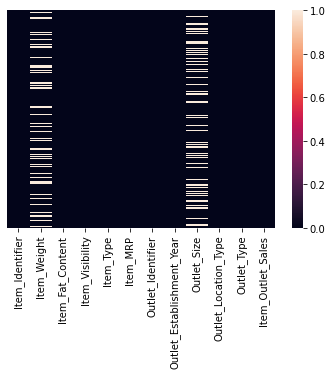

In [313]:
sns.heatmap(df.isnull(),yticklabels=False)

In [314]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [315]:
df['Item_Weight'].isnull().sum()

0

In [316]:
outlet_size_mode = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [317]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool,'Outlet_Size']= df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [318]:
df['Outlet_Size'].isnull().sum()

0

In [319]:
df['Item_Fat_Content'] =df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [320]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [375]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet
0,FDA15,9.300000,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,9
1,DRC01,5.920000,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,3
2,FDN15,17.500000,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,9
3,FDX07,19.200000,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,0
4,NCD19,8.930000,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,1
5,FDP36,10.395000,1,0.000000,0,51.4008,OUT018,2009,1,2,2,556.6088,3
6,FDO10,13.650000,1,0.012741,13,57.6588,OUT013,1987,0,2,1,343.5528,1
7,FDP10,12.857645,0,0.127470,13,107.7622,OUT027,1985,1,2,3,4022.7636,5
8,FDH17,16.200000,1,0.016687,5,96.9726,OUT045,2002,2,1,1,1076.5986,7
9,FDU28,19.200000,1,0.094450,5,187.8214,OUT017,2007,2,1,1,4710.5350,2


In [322]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [323]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [324]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [325]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Exploratory Data Analysis

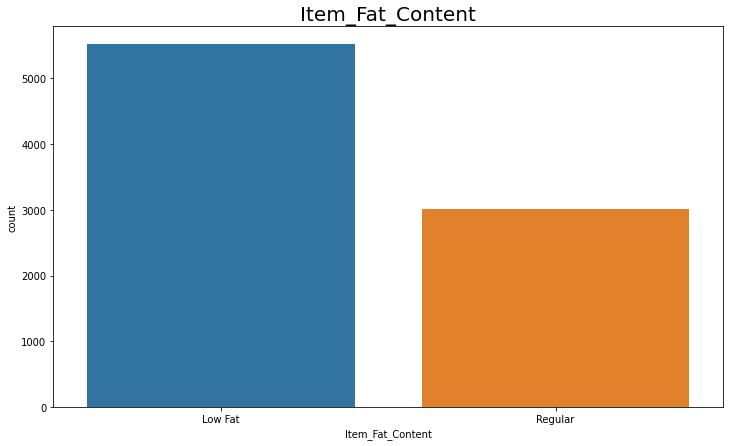

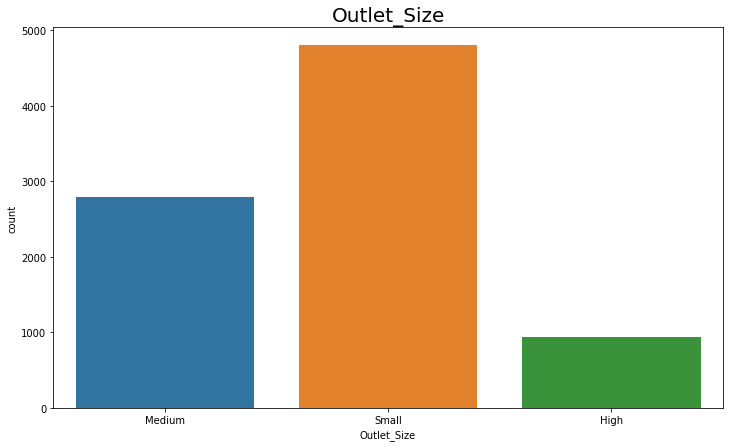

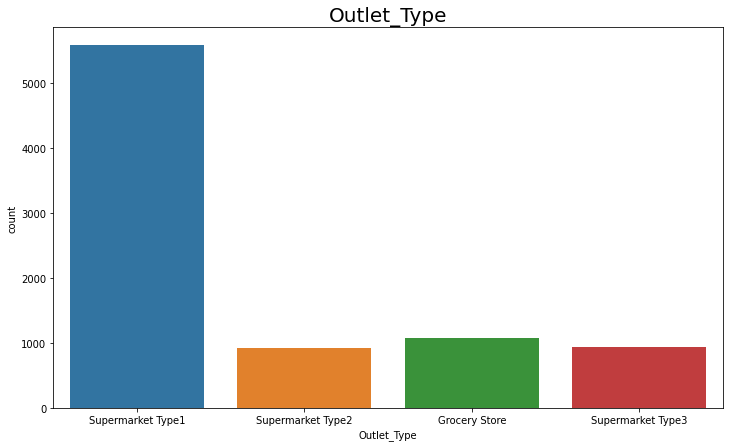

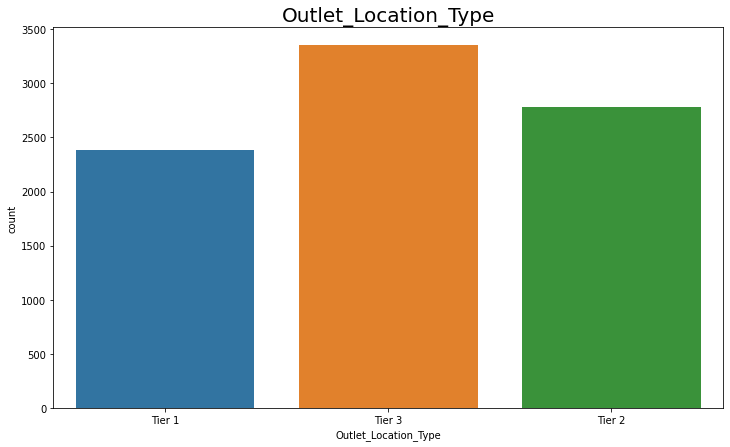

In [326]:
plt.figure(figsize=(12,7))
sns.countplot(df['Item_Fat_Content'])
plt.title('Item_Fat_Content',fontsize=20)
plt.show()
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Size'])
plt.title('Outlet_Size',fontsize=20)
plt.show()
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Type'])
plt.title('Outlet_Type',fontsize=20)
plt.show()
plt.figure(figsize=(12,7))
sns.countplot(df['Outlet_Location_Type'])
plt.title('Outlet_Location_Type',fontsize=20)
plt.show()

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

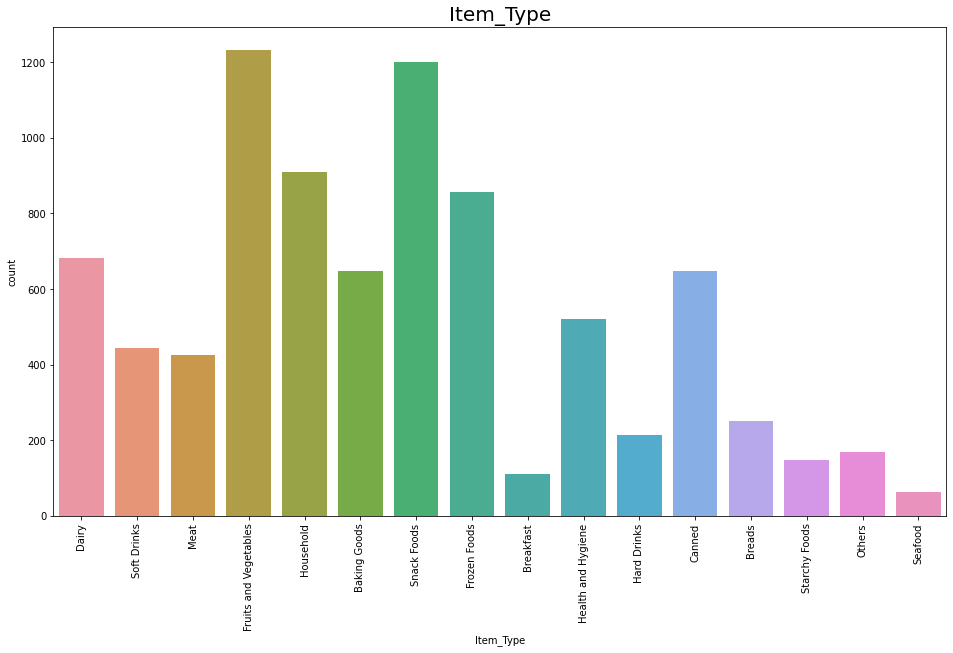

In [327]:
plt.figure(figsize=(16,9))
label=list(df['Item_Type'].unique())
itemtype= sns.countplot(df['Item_Type'])
plt.title('Item_Type',fontsize=20)
itemtype.set_xticklabels(labels=label,rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

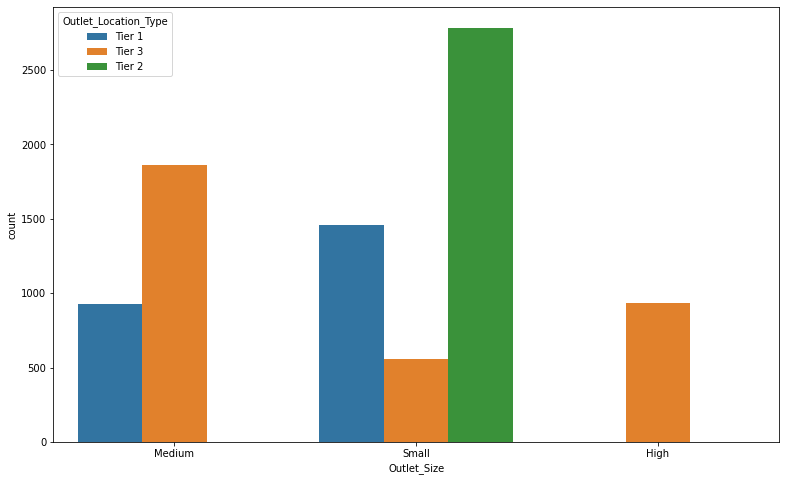

In [328]:
plt.figure(figsize=(13,8))
sns.countplot(df['Outlet_Size'],hue=df['Outlet_Location_Type'])

Text(0.5, 1.0, 'Item_Weight')

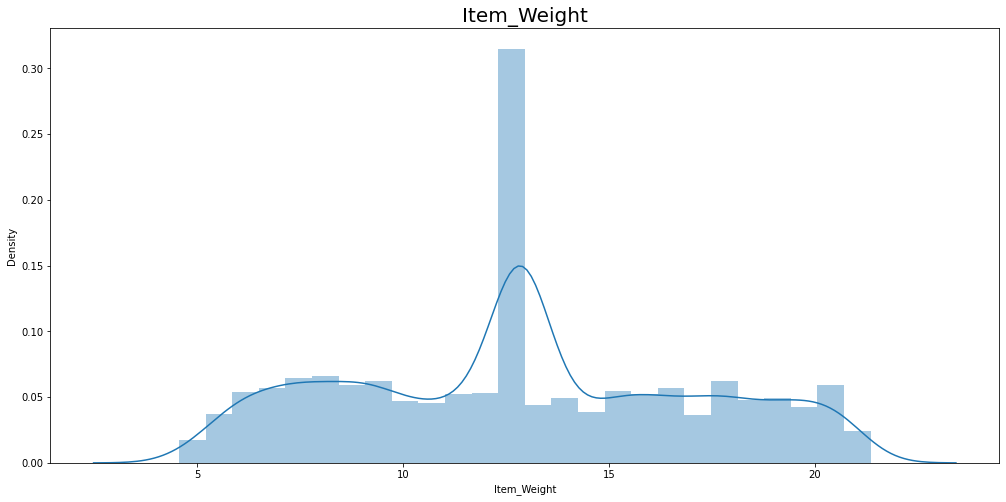

In [329]:
plt.figure(figsize=(17,8))
sns.distplot(df['Item_Weight'])
plt.title('Item_Weight', fontsize = 20)

Text(0.5, 1.0, 'Item_Visibility')

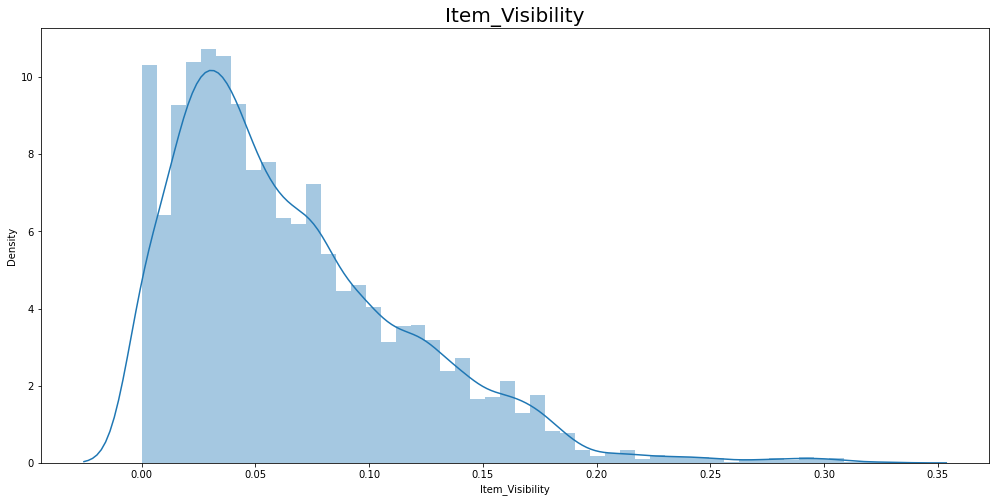

In [330]:
plt.figure(figsize=(17,8))
sns.distplot(df['Item_Visibility'])
plt.title('Item_Visibility', fontsize = 20)

Text(0.5, 1.0, 'Item_MRP')

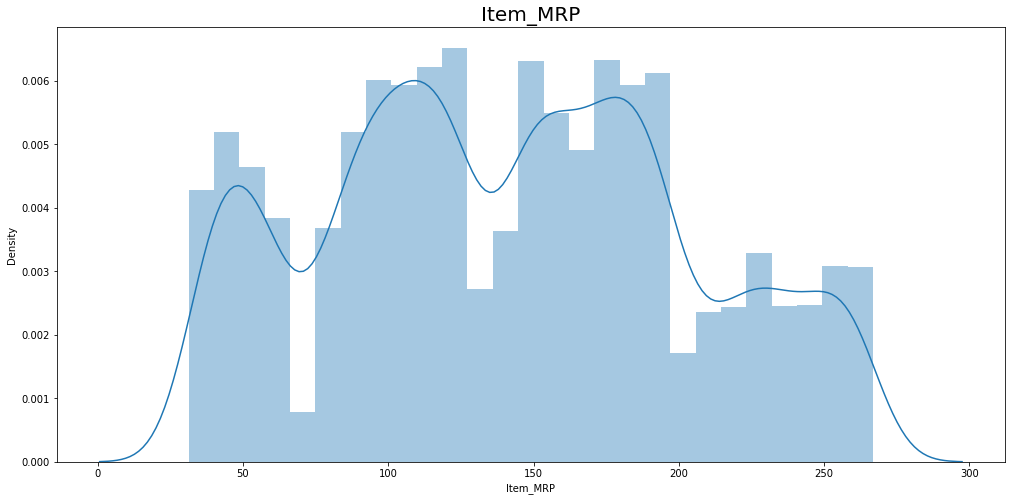

In [331]:
plt.figure(figsize=(17,8))
sns.distplot(df['Item_MRP'])
plt.title('Item_MRP', fontsize = 20)

Text(0.5, 1.0, 'Outlet_Establishment_Year')

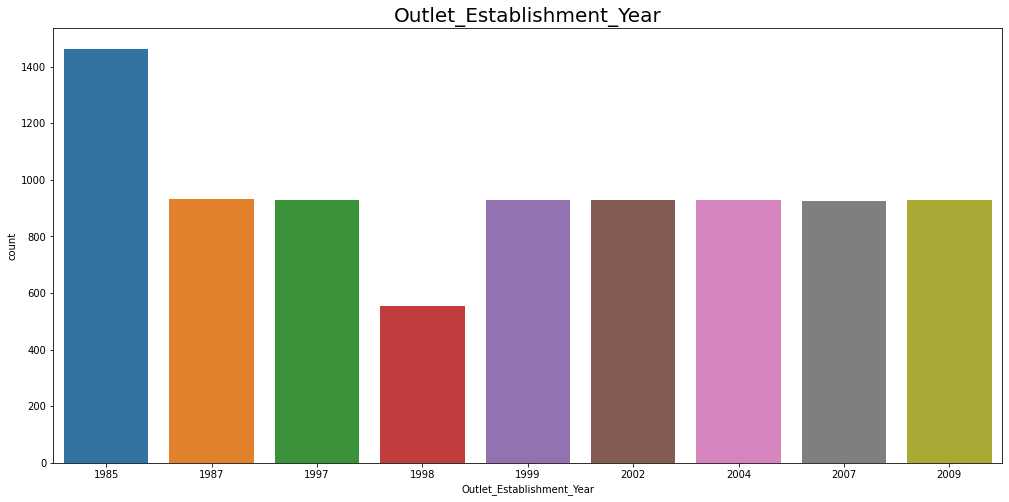

In [332]:
plt.figure(figsize=(17,8))
sns.countplot(df['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year',fontsize=20)

Text(0.5, 1.0, 'Item_Outlet_Sales')

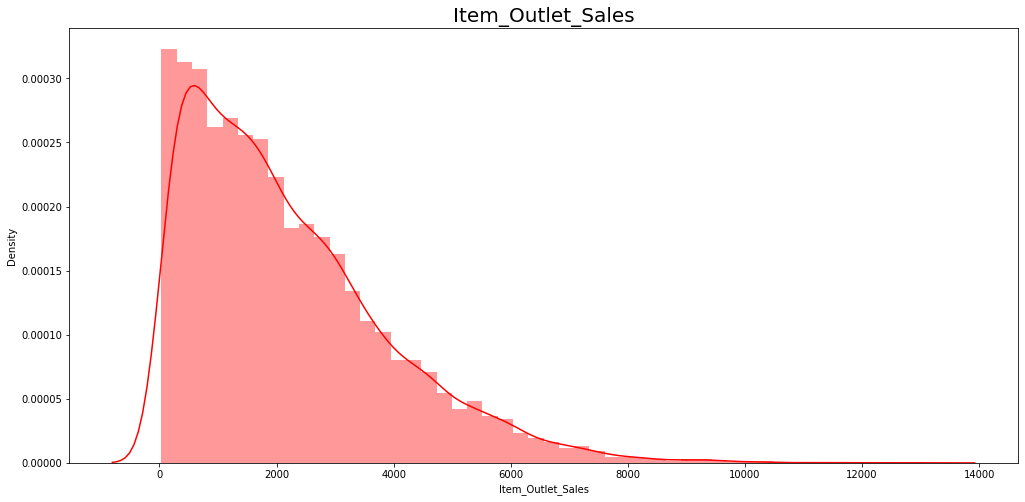

In [333]:
plt.figure(figsize=(17,8))
sns.distplot(df['Item_Outlet_Sales'],color='red')
plt.title('Item_Outlet_Sales', fontsize = 20)

Text(0.5, 1.0, 'Item_Type')

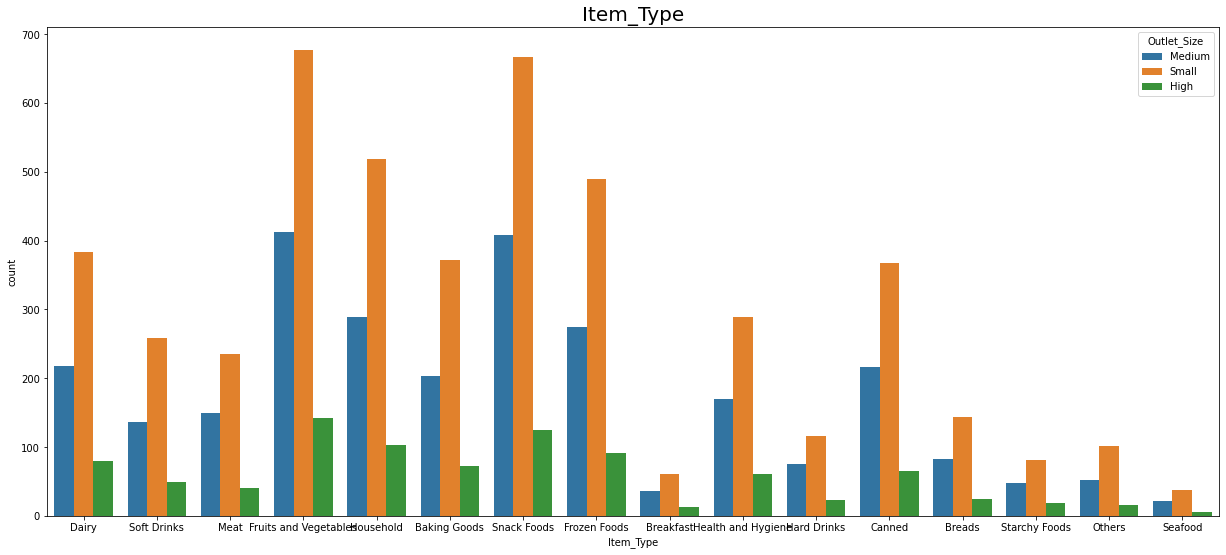

In [335]:
plt.figure(figsize=(21,9))
sns.countplot('Item_Type',data=df,hue='Outlet_Size')
plt.title('Item_Type',fontsize=20)

Text(0.5, 1.0, 'Item_Type')

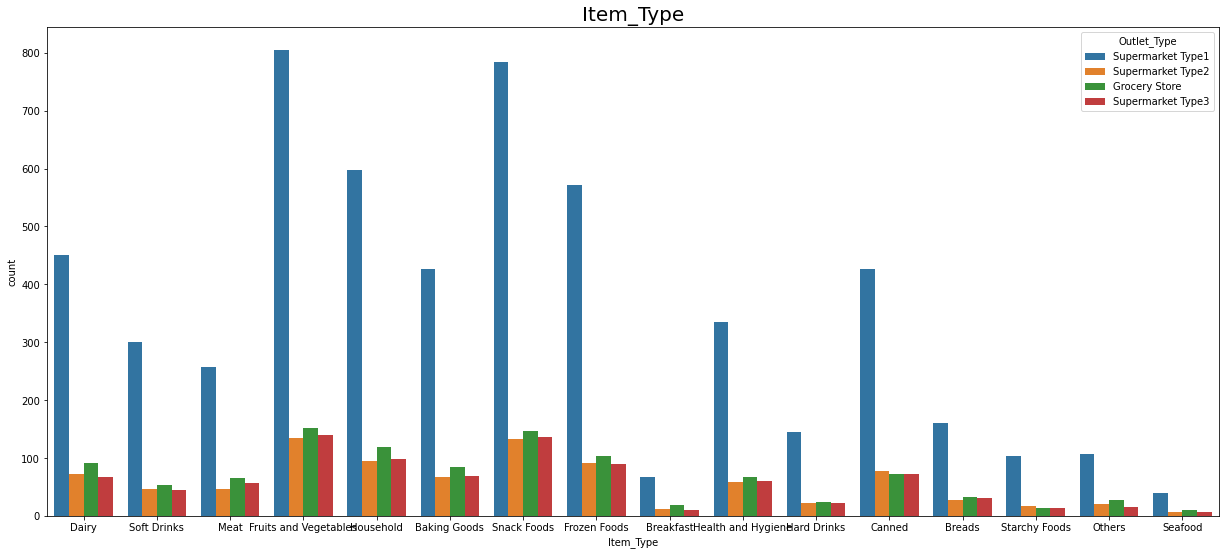

In [336]:
plt.figure(figsize=(21,9))
sns.countplot('Item_Type',data=df,hue='Outlet_Type')
plt.title('Item_Type',fontsize=20)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

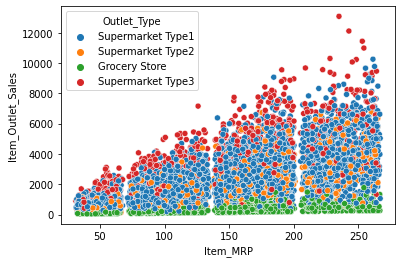

In [337]:
sns.scatterplot(df["Item_MRP"],df["Item_Outlet_Sales"],hue="Outlet_Type",data=df)

In [338]:
corr=df.corr()

<AxesSubplot:>

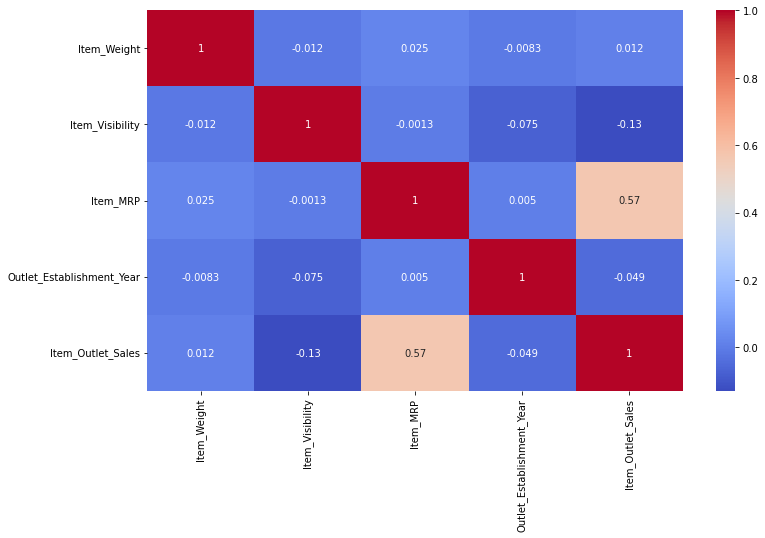

In [339]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [340]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [341]:
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [342]:
X=df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [368]:
from sklearn.metrics import mean_squared_error

In [369]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=0)

# LinearRegression

In [370]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression(normalize=True)

In [371]:
lmodel.fit(xtrain,ytrain)

LinearRegression(normalize=True)

In [372]:

ypred_test = lmodel.predict(xtest)

In [373]:
lmodel.score(xtrain,ytrain)

0.503276202077364

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

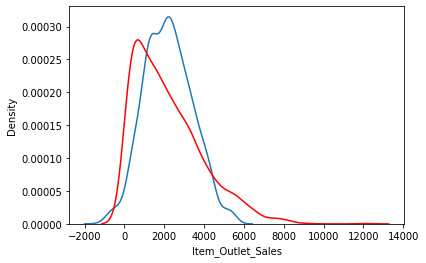

In [349]:
sns.distplot(ypred_test,hist=False)
sns.distplot(ytest,hist=False,color='r')

In [374]:
from sklearn.metrics import mean_absolute_error
print("Testing Mean Absolute Error",mean_absolute_error(ytest,ypred_test))

Testing Mean Absolute Error 922.6104113468812


# RandomforestRegressor


In [351]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state = 0, test_size = 0.25)
model = RandomForestRegressor(random_state=40)
model.fit(X_train, Y_train)
pred_y = model.predict(X_test)

In [352]:
model.score(X_train,Y_train)

0.9379300906428132

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

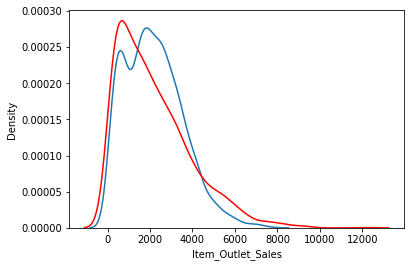

In [353]:
sns.distplot(pred_y,hist=False)
sns.distplot(Y_test,hist=False,color='r')

# DecisionTreeRegressor

In [354]:
from sklearn.tree import DecisionTreeRegressor

In [355]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state = 0, test_size = 0.25)
tree=DecisionTreeRegressor(random_state=40)
tree.fit(X_train,Y_train)
pred_y=tree.predict(X_test)


In [356]:
tree.score(X_train,Y_train)

1.0

In [357]:
print("Testing Mean Absolute Error",mean_absolute_error(Y_test,pred_y))

Testing Mean Absolute Error 1126.2911500703894


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

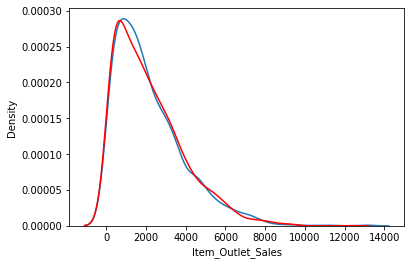

In [358]:
sns.distplot(pred_y,hist=False)
sns.distplot(Y_test,hist=False,color='r')

# Support Vector machine

In [359]:
from sklearn.svm import SVR

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.25)

In [385]:
svm=SVR(epsilon=15,kernel='linear')
svm.fit(X_train,y_train)
pred_r=svm.predict(X_test)

In [386]:
svm.score(X_train,y_train)

0.47582970687555903

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

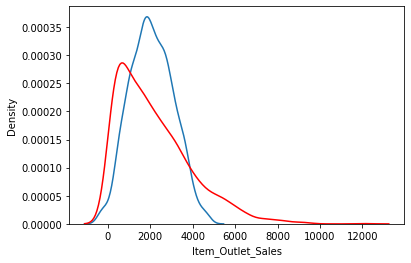

In [387]:
sns.distplot(pred_r,hist=False)
sns.distplot(y_test,hist=False,color='r')

# GradientBoostingRegressor

In [364]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.25)

In [365]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
p=gbr.predict(X_test)

In [366]:
gbr.score(X_train,y_train)

0.6358501881740388

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

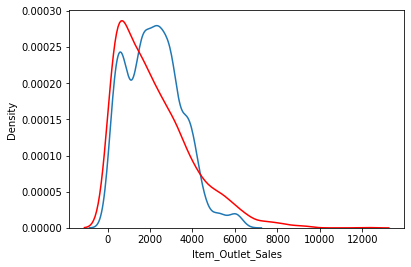

In [367]:
sns.distplot(p,hist=False)
sns.distplot(y_test,hist=False,color='r')